In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso
import warnings

warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
mercedez_df=pd.read_csv('train.csv')
y=mercedez_df['y']

mercedez_df.dtypes
mercedez_train_df=mercedez_df


In [7]:
na_df=pd.DataFrame({'col_name':mercedez_train_df.columns,'na_count':mercedez_train_df.isnull().sum(),'na_pc': mercedez_train_df.isnull().sum()/mercedez_train_df.shape[0]*100})
na_df
cols_50grt_nas=list(na_df[na_df['na_pc']>50]['col_name'])
cols_50grt_nas

[]

In [8]:
cols_unique_same=[]
for col in mercedez_df.columns:
    if mercedez_df[col].nunique()==1 or mercedez_df[col].nunique()==mercedez_df.shape[0]:
        cols_unique_same.append(col)
        
cols_unique_same

cols_to_drop=cols_50grt_nas+cols_unique_same

cols_to_drop.append('y')
cols_to_drop

mercedez_df.drop(columns=cols_to_drop,inplace=True)

In [9]:
mercedez_df.shape

(4209, 364)

In [10]:
num_cols=[col for col in mercedez_df.columns if mercedez_df[col].dtype!='object']

cat_cols=[col for col in mercedez_df.columns if mercedez_df[col].dtype=='object']

mercedez_df[num_cols]


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
X_train,X_test,y_train,y_test=train_test_split(mercedez_df,y,test_size=0.2,random_state=42)

In [12]:
for col in mercedez_df.columns:
    X_train[col]=X_train[col].fillna(X_train[col].mode()[0])
    X_test[col]=X_test[col].fillna(X_train[col].mode()[0])

In [13]:
one_train=pd.get_dummies(X_train)
one_test=pd.get_dummies(X_test)


In [14]:
one_train_final,one_test_final=one_train.align(one_test,join='inner',axis=1,fill_value=0)

In [15]:
X_train_final=one_train_final
X_test_final=one_test_final

X_train_final

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
1006,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1877,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2791,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4181,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
978,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
#PCA 
from sklearn.decomposition import PCA
pca=PCA()
X_train_pca_df=pd.DataFrame(pca.fit_transform(X_train_final))
X_train_pca_df

#plt.plot(np.cumsum(pca.explained_variance_ratio_))


,0,1,2,3,4,5,6,7,8,9,...,516,517,518,519,520,521,522,523,524,525
0,-1.424867,0.346277,2.255403,-1.295494,-0.202537,0.326374,-1.009018,0.226229,-0.710860,-0.710291,...,-6.270797e-17,1.769168e-17,2.446299e-17,1.384591e-16,2.500877e-16,-1.935241e-16,-1.822784e-17,5.854265e-17,-4.570657e-17,2.112628e-17
1,-1.903661,-0.460068,0.541429,-0.220493,1.388780,0.645832,-1.894583,-1.113923,1.034391,-1.685986,...,-1.332277e-18,-7.914028e-18,1.580953e-18,-1.608494e-18,-2.727848e-18,1.998700e-17,1.199913e-17,-1.534422e-18,1.904842e-18,-5.790405e-19
2,0.849868,-1.014941,2.092395,-1.214463,-1.984194,-0.318872,-0.134642,-0.083395,-0.070592,-0.015086,...,9.010137e-17,-1.275110e-16,6.027472e-18,-1.485279e-17,2.976339e-16,5.483013e-17,-5.516673e-17,7.664852e-17,1.030055e-16,-7.963282e-18
3,1.011577,-0.136095,1.235652,1.394447,2.743233,0.154447,2.366444,0.826946,-0.559201,0.104867,...,-2.209012e-17,-1.614060e-16,-1.080790e-17,-5.508885e-17,-2.138524e-17,-3.636948e-18,6.783917e-17,6.391999e-17,3.643489e-17,-5.920683e-18
4,0.723062,3.242660,-0.279800,2.646604,-0.389615,0.025216,-0.143376,-0.680529,1.343321,-1.510109,...,7.065772e-17,2.259358e-17,2.310223e-18,-1.102597e-17,-2.628735e-16,-1.656281e-16,-9.661425e-17,-3.070944e-16,-4.392055e-17,-2.576365e-17
5,1.286761,-1.538370,-3.123684,1.270595,0.035855,-0.727171,-0.135103,-1.159494,0.405054,-0.558391,...,-7.131894e-17,1.270107e-16,-3.594151e-17,9.811369e-17,-8.057704e-16,-1.540987e-16,1.686790e-16,2.037232e-17,-4.977033e-17,2.031234e-18
6,1.567972,-1.571095,-2.533449,0.265825,0.504893,-0.502699,-1.256105,0.257207,0.088486,0.178554,...,-1.262922e-17,-8.338791e-17,2.183377e-17,-2.890600e-17,7.527617e-17,1.080885e-16,-1.459958e-16,2.656808e-17,-2.004454e-17,9.586854e-18
7,1.159863,-0.672380,-1.416531,-1.124739,-0.140249,0.713302,0.278048,2.566761,1.262856,-0.851245,...,3.226677e-17,-1.668001e-16,1.120061e-16,5.577933e-17,-4.319788e-16,-1.823006e-16,3.922782e-17,1.777282e-16,5.958972e-17,1.160262e-17
8,-1.270119,0.728569,-2.422937,0.241317,-0.024890,-0.504393,-1.722672,1.153210,-0.508404,0.279287,...,-1.533850e-16,6.419823e-17,3.646968e-17,-2.937643e-17,4.856336e-16,8.663668e-17,-3.843242e-17,-7.541853e-17,4.588458e-18,-1.961623e-17
9,0.397776,-0.578381,-2.918938,1.103263,-0.359347,-0.023683,0.437764,-1.309276,0.873705,1.589293,...,2.683258e-17,-2.260679e-16,-1.106375e-16,-1.004845e-16,-6.652654e-16,7.928478e-17,2.428688e-16,2.551192e-16,4.106516e-17,-1.760832e-17


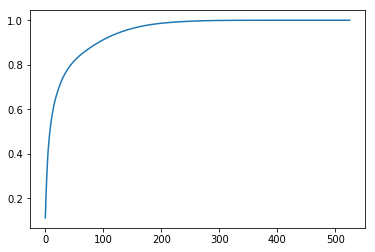

In [28]:
pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [32]:
pca_1=PCA(n_components=200)
X_train_pca_df=pd.DataFrame(pca_1.fit_transform(X_train_final),columns=list(range(0,200)))

X_test_pca_df=pd.DataFrame(pca_1.transform(X_test_final))


In [33]:
# proof that PCA rsults in zero or no Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF is a measure of multicollinearity
vif_pca=pd.DataFrame()
vif_pca["VIF Factor"]=[variance_inflation_factor(X_train_pca_df.values,i) for i in range(X_train_pca_df.shape[1])]
vif_pca["VIF Features"] =X_train_pca_df.columns
vif_pca

,VIF Factor,VIF Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


In [34]:
linreg=LinearRegression()
linreg.fit(X_train_pca_df,y_train)

pred=linreg.predict(X_test_pca_df)

r2_score(y_test,pred)

print('Train Score',linreg.score(X_train_pca_df,y_train))

print('Test Score',linreg.score(X_test_pca_df,y_test))

Train Score 0.5873620233893749
Test Score 0.5827172476025084


In [36]:
from sklearn.tree import DecisionTreeRegressor

dcsn_tree_rgsr=DecisionTreeRegressor()
dcsn_tree_rgsr.fit(X_train_pca_df,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
dcsn_tree_rgsr.predict(X_test_pca_df)
dcsn_tree_rgsr.score(X_train_pca_df,y_train)
dcsn_tree_rgsr.score(X_test_pca_df,y_test)

0.0196920767257871

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
grd_bst_rgr=GradientBoostingRegressor()
grd_bst_rgr.fit(X_train_pca_df,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
grd_bst_rgr.score(X_train_pca_df,y_train)
grd_bst_rgr.score(X_test_pca_df,y_test)

0.5235264588302296

In [51]:
param_dict={'n_estimators':[50,60,70,100],
            'min_samples_split':[2,3,4],
            'max_depth':[3,4,7]}
from  sklearn.model_selection import GridSearchCV
gcv= GridSearchCV(grd_bst_rgr,param_grid=param_dict,cv=5,verbose=5)
gcv.fit(X_train_pca_df,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=3, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_split=2, n_estimators=50, score=0.366718252712562, total=   3.2s
[CV] max_depth=3, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=2, n_estimators=50, score=0.5091481265674171, total=   3.0s
[CV] max_depth=3, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=2, n_estimators=50, score=0.5451262292195234, total=   3.1s
[CV] max_depth=3, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=2, n_estimators=50, score=0.509551824619953, total=   3.1s
[CV] max_depth=3, min_samples_split=2, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=2, n_estimators=50, score=0.4797794962022719, total=   3.0s
[CV] max_depth=3, min_samples_split=2, n_estimators=60 ...............
[CV]  max_depth=3, min_samples_split=2, n_estimators=60, score=0.3665440782076619, total=   3.5s
[CV] max_depth=3, min_samples_split=2, n_estimators=60 ...............
[CV]  max_depth=3, min_samples_split=2, n_estimators=60, score=0.5162625302841073, total=   3.5s
[CV] max_depth=3, min_samples_split=2, n_estimators=60 ...............
[CV]  max_depth=3, min_samples_split=2, n_estimators=60, score=0.5406396511183598, total=   3.5s
[CV] max_depth=3, min_samples_split=2, n_estimators=60 ...............
[CV]  max_depth=3, min_samples_split=2, n_estimators=60, score=0.5136294128328169, total=   3.4s
[CV] max_depth=3, min_samples_split=2, n_estimators=60 ...............
[CV]  max_depth=3, min_samples_split=2, n_estimators=60, score=0.48798102217662276, total=   3.5s
[CV] max_depth=3, min_samples_split=2, n_estimators=70 .......

[CV]  max_depth=3, min_samples_split=4, n_estimators=70, score=0.5195434377111865, total=   4.0s
[CV] max_depth=3, min_samples_split=4, n_estimators=70 ...............
[CV]  max_depth=3, min_samples_split=4, n_estimators=70, score=0.4909346656959923, total=   4.1s
[CV] max_depth=3, min_samples_split=4, n_estimators=100 ..............
[CV]  max_depth=3, min_samples_split=4, n_estimators=100, score=0.3697804289036978, total=   5.9s
[CV] max_depth=3, min_samples_split=4, n_estimators=100 ..............
[CV]  max_depth=3, min_samples_split=4, n_estimators=100, score=0.5164680822452539, total=   5.7s
[CV] max_depth=3, min_samples_split=4, n_estimators=100 ..............
[CV]  max_depth=3, min_samples_split=4, n_estimators=100, score=0.546647845949829, total=   5.8s
[CV] max_depth=3, min_samples_split=4, n_estimators=100 ..............
[CV]  max_depth=3, min_samples_split=4, n_estimators=100, score=0.5278202790833754, total=   5.7s
[CV] max_depth=3, min_samples_split=4, n_estimators=100 ....

[CV]  max_depth=4, min_samples_split=4, n_estimators=50, score=0.5419462868604423, total=   4.2s
[CV] max_depth=4, min_samples_split=4, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=50, score=0.5247482898984588, total=   4.1s
[CV] max_depth=4, min_samples_split=4, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=50, score=0.505987938784494, total=   4.1s
[CV] max_depth=4, min_samples_split=4, n_estimators=60 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=60, score=0.3652112256615546, total=   4.9s
[CV] max_depth=4, min_samples_split=4, n_estimators=60 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=60, score=0.5185144740147671, total=   5.1s
[CV] max_depth=4, min_samples_split=4, n_estimators=60 ...............
[CV]  max_depth=4, min_samples_split=4, n_estimators=60, score=0.550358553130867, total=   4.9s
[CV] max_depth=4, min_samples_split=4, n_estimators=60 ..........

[CV]  max_depth=7, min_samples_split=3, n_estimators=70, score=0.5059409205572927, total=  13.9s
[CV] max_depth=7, min_samples_split=3, n_estimators=70 ...............
[CV]  max_depth=7, min_samples_split=3, n_estimators=70, score=0.4997712267989506, total=  13.5s
[CV] max_depth=7, min_samples_split=3, n_estimators=70 ...............
[CV]  max_depth=7, min_samples_split=3, n_estimators=70, score=0.4984337085568888, total=  13.6s
[CV] max_depth=7, min_samples_split=3, n_estimators=70 ...............
[CV]  max_depth=7, min_samples_split=3, n_estimators=70, score=0.5046078443049069, total=  13.9s
[CV] max_depth=7, min_samples_split=3, n_estimators=100 ..............
[CV]  max_depth=7, min_samples_split=3, n_estimators=100, score=0.3421279502650897, total=  18.7s
[CV] max_depth=7, min_samples_split=3, n_estimators=100 ..............
[CV]  max_depth=7, min_samples_split=3, n_estimators=100, score=0.5028213707208204, total=  19.4s
[CV] max_depth=7, min_samples_split=3, n_estimators=100 .....

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 23.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 60, 70, 100], 'min_samples_split': [2, 3, 4], 'max_depth': [3, 4, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [53]:
gcv.score(X_train_pca_df,y_train)
gcv.score(X_test_pca_df,y_test)

0.504946188193595

In [179]:
linreg=LinearRegression()
linreg.fit(X_train_final,y_train)

pred=linreg.predict(X_test_final)

r2_score(y_test,pred)

print('Train Score',linreg.score(X_train_final,y_train))

print('Test Score',linreg.score(X_test_final,y_test))

Train Score 0.6220669548239931
Test Score -1.5369468868732876e+20


In [180]:
lasso=Lasso(alpha=0.00009,tol=0.003,max_iter=1000)
lasso.fit(X_train_final,y_train)
predictions=lasso.predict(X_test_final)
r2_score(y_test,predictions)
lasso.score(X_train_final,y_train)

print('Train Score',lasso.score(X_train_final,y_train))

print('Test Score',lasso.score(X_test_final,y_test))

Train Score 0.6217345802803225
Test Score 0.5411673421193937


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF is a measure of multicollinearity
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X_train_final.values,i) for i in range(X_train_final.shape[1])]
vif["VIF Features"] =X_train_final.columns
vif


,VIF Factor,VIF Features
0,inf,X10
1,inf,X12
2,inf,X13
3,inf,X14
4,inf,X15
5,inf,X16
6,inf,X17
7,inf,X18
8,inf,X19
9,inf,X20


In [167]:
from sklearn.tree import DecisionTreeRegressor

dcsn_tree_rgsr=DecisionTreeRegressor()
dcsn_tree_rgsr.fit(X_train_final,y_train)`
dcsn_tree_rgsr.predict(X_test_final)

array([ 92.32      ,  96.51      , 106.33      ,  77.36      ,
       121.79      ,  92.52      ,  90.155     ,  98.93      ,
        99.58      , 106.88      ,  73.76      ,  88.59      ,
        90.82      ,  99.95      ,  93.59      , 102.97      ,
       114.07      ,  92.22      ,  90.47      , 108.41      ,
       123.705     ,  89.19      ,  91.08      , 101.3       ,
        98.97      , 106.06      ,  98.01      ,  86.19      ,
        92.91      ,  93.76      ,  91.79      , 105.55      ,
        91.16      , 112.19      , 109.13      , 113.39      ,
       109.02      ,  97.28      ,  91.25666667,  94.83      ,
       110.47      , 107.53      ,  91.16      , 130.97      ,
        88.1       ,  88.01      ,  90.05      , 101.44      ,
       107.77      , 104.74      , 121.28      , 104.25      ,
       106.31      , 100.32      ,  91.57      ,  92.99      ,
        92.65      , 116.93      ,  99.98      ,  91.39      ,
       116.57      ,  74.99      ,  93.8       ,  89.49